This notebook is for the paper: Cohen, Joseph Paul, et al. Predicting COVID-19 Pneumonia Severity on Chest X-Ray with Deep Learning. May 2020, http://arxiv.org/abs/2005.11856

The images are found here: https://github.com/ieee8023/covid-chestxray-dataset

The dataloader and models are found here: https://github.com/mlmed/torchxrayvision

In [1]:
%load_ext autoreload
%autoreload 2

In [96]:
import os,sys
sys.path.insert(0,"..")
#sys.path.insert(0,"../..")
sys.path.insert(0, "/workspace/update/torchxrayvision")
sys.path.insert(0, "/workspace/update/torchxrayvision/torchxrayvision")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import sys
import torch.nn.functional as F
import pandas as pd

In [97]:
import torchxrayvision as xrv

In [98]:
nn_model = xrv.models.DenseNet(weights="all_cropped_relabelled-nih_v1")#.cuda
nn_model.op_threshs = None # to prevent sigmoid

In [5]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [99]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])

In [110]:
transform

Compose(
)

In [111]:
dmerge = xrv.datasets.COVID19_Dataset(imgpath="/raid/COVID19/covid-chestxray-dataset/images",
                                      csvpath="/raid/COVID19/covid-chestxray-dataset/metadata.csv",
                                      transform=transform, views=["PA"])

In [7]:
dmerge = xrv.datasets.COVID19_Dataset(imgpath="/raid/COVID19/dataset_evaluasi/xray_2020-09-17",
                                      csvpath="/raid/COVID19/covid-chestxray-dataset/metadata.csv",
                                      transform=transform, views=["AP"])

In [97]:
dmerge = xrv.datasets.COVID19_Indonesia_Dataset(imgpath="/raid/COVID19/dataset_evaluasi/xray_2020-09-17",
                                      csvpath="/raid/COVID19/dataset_evaluasi/xray_indonesia.csv",
                                      transform=transform, views=["PA"])

In [100]:
dmerge = xrv.datasets.COVID19_Indonesia_Dataset(imgpath="/raid/COVID19/dataset_evaluasi/xray_2020-09-17-cropped",
                                      csvpath="/raid/COVID19/dataset_evaluasi/xray_indonesia.csv",
                                      transform=transform, views=["AP"])

In [101]:
dmerge

{'consolidation': {0.0: 30, 1.0: 9}, 'ggo': {0.0: 24, 1.0: 15}}


COVID19_Indonesia_Dataset num_samples=39 views=['AP']

In [11]:
scores = pd.read_csv("covid-severity-scores.csv", skiprows=5)
scores = scores.set_index("filename")

In [102]:
scores = pd.read_csv("xray_indonesia_scores.csv")
scores = scores.set_index("filename")

In [103]:
scores

,geographic_mean,opacity_mean
filename,,
201.png,0,0
219-a.jpg,0,0
219-b.jpg,0,0
249.jpg,0,0
250-a.jpg,0,0
...,...,...
665.jpg,0,0
797.png,0,0
802.png,1,1


In [104]:
dmerge.csv = dmerge.csv.set_index("filename").join(scores, on="filename").reset_index()

In [105]:
dmerge.csv

,filename,id,source,status,view,is_annotated,is_qualified,ggo,consolidation,right_area,left_area,right_degree,left_degree,geographic_mean,opacity_mean
0,150.jpg,150,neurabot,positive,AP,True,True,1,1,2,2,2,1,4,3
1,155.jpg,155,neurabot,positive,AP,True,True,1,1,4,3,2,2,7,4
2,201.png,201,neurabot,negative,AP,True,True,0,0,0,0,0,0,0,0
3,219-a.jpg,219,neurabot,negative,AP,True,True,0,0,0,0,0,0,0,0
4,236-a.png,236,neurabot,positive,AP,True,True,1,1,2,4,2,2,6,4
5,249.jpg,249,neurabot,negative,AP,True,True,0,0,0,0,0,0,0,0
6,250-b.jpg,250,neurabot,negative,AP,True,True,0,0,0,0,0,0,0,0
7,278.png,278,neurabot,positive,AP,True,True,1,1,3,2,2,1,5,3
8,425-a.png,425,neurabot,positive,AP,True,True,1,0,2,2,1,1,4,2
9,433-a.png,433,neurabot,positive,AP,True,True,1,0,1,0,1,0,1,1


In [106]:
dmerge.csv.geographic_mean[~dmerge.csv.geographic_mean.isna()].describe()

count    39.000000
mean      1.358974
std       1.979994
min       0.000000
25%       0.000000
50%       0.000000
75%       2.500000
max       7.000000
Name: geographic_mean, dtype: float64

In [107]:
dl = torch.utils.data.DataLoader(dmerge, batch_size=32, num_workers=64, pin_memory=True)

In [108]:
d_feats = []
d_preds = []
with torch.no_grad():
    for i, batch in enumerate(dl):
        imgs = batch["img"]#.cuda() #cuda
        out = nn_model.features(imgs)
        out = F.relu(out, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        pred = nn_model(imgs)
        d_feats.append(out.detach().cpu().numpy())
        d_preds.append(pred.detach().cpu().numpy())
        if i %10 == 0:
            print(i)
d_feats = np.concatenate(d_feats).reshape(-1,1024)
d_preds = np.concatenate(d_preds)

0


In [109]:
len(d_preds)

39

In [110]:
d_preds.shape

(39, 18)

In [111]:
len(d_preds[0])

18

In [112]:
dmerge.csv = dmerge.csv.join(pd.DataFrame(d_preds, columns=xrv.datasets.default_pathologies))

In [113]:
dmerge.csv 

,filename,id,source,status,view,is_annotated,is_qualified,ggo,consolidation,right_area,...,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum
0,150.jpg,150,neurabot,positive,AP,True,True,1,1,2,...,-1.155268,-6.600797,-1.383371,-4.137414,-6.065628,-8.691063,-4.127515,-3.999606,-0.494975,-1.796505
1,155.jpg,155,neurabot,positive,AP,True,True,1,1,4,...,1.690789,-1.757106,-0.541988,-1.746557,-0.620025,-5.820380,-0.152445,-3.212157,0.924328,-1.350947
2,201.png,201,neurabot,negative,AP,True,True,0,0,0,...,-3.602738,-4.244232,-4.588480,-2.229515,-2.406463,-3.076390,-6.359890,-4.228660,-3.724645,-5.509398
3,219-a.jpg,219,neurabot,negative,AP,True,True,0,0,0,...,-2.392695,-4.135163,-2.254196,-2.413589,0.029355,-3.656647,-5.210176,-3.573389,-2.036195,-4.066219
4,236-a.png,236,neurabot,positive,AP,True,True,1,1,2,...,-0.889722,-2.503088,-0.963389,-2.337481,-2.791702,-2.780729,-3.229552,-3.275186,-0.918400,-2.462497
5,249.jpg,249,neurabot,negative,AP,True,True,0,0,0,...,-0.169016,-2.828355,-0.843510,-1.650159,1.932717,-4.422142,-1.092796,-3.393421,-0.397994,-0.505940
6,250-b.jpg,250,neurabot,negative,AP,True,True,0,0,0,...,-3.543527,-6.910836,-4.233346,-4.059155,-3.974713,-7.675301,-7.457361,-3.687270,-2.766458,-4.799124
7,278.png,278,neurabot,positive,AP,True,True,1,1,3,...,0.738467,-0.012364,1.219282,-2.803271,-3.252949,-3.569831,-1.116406,-1.770307,1.017054,-0.558886
8,425-a.png,425,neurabot,positive,AP,True,True,1,0,2,...,-4.463749,-6.243820,-4.731828,-3.934482,-5.955737,-6.761166,-5.679649,-3.513257,-3.104232,-4.180507
9,433-a.png,433,neurabot,positive,AP,True,True,1,0,1,...,-3.734505,-4.142041,-1.404047,-2.482724,-1.168032,-2.501594,-3.830713,-2.818208,-2.391475,-2.970957


In [114]:
d_preds.shape

(39, 18)

In [115]:
d_feats.shape

(39, 1024)

In [116]:
labels = dmerge.csv.Cardiomegaly
labels

0    -1.383371
1    -0.541988
2    -4.588480
3    -2.254196
4    -0.963389
5    -0.843510
6    -4.233346
7     1.219282
8    -4.731828
9    -1.404047
10   -4.767861
11   -4.119934
12   -5.716230
13   -4.389648
14   -0.893857
15   -2.385476
16   -2.023005
17   -2.353205
18   -5.233949
19   -3.460384
20   -3.621264
21   -2.458045
22   -3.920012
23   -3.877153
24   -1.432825
25   -1.709346
26   -3.566910
27   -5.326467
28   -4.055636
29   -1.559577
30    0.428974
31   -2.082579
32   -1.654601
33   -4.154683
34   -4.177940
35   -5.018635
36   -1.578307
37   -2.165292
38    1.487784
Name: Cardiomegaly, dtype: float32

In [117]:
labels = dmerge.csv.geographic_mean
data = d_preds
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]

In [118]:
labels = dmerge.csv.geographic_mean
data = d_preds
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Consolidation")]]

In [119]:
data

array([[-0.4949752 , -1.1552676 , -4.089259  ],
       [ 0.9243281 ,  1.6907892 ,  1.6524844 ],
       [-3.7246447 , -3.6027384 , -6.7367363 ],
       [-2.0361948 , -2.3926952 , -4.9373875 ],
       [-0.9184004 , -0.8897223 , -3.2880073 ],
       [-0.39799422, -0.16901647, -0.13224098],
       [-2.7664583 , -3.5435271 , -7.419412  ],
       [ 1.0170536 ,  0.73846656, -0.5117751 ],
       [-3.1042323 , -4.463749  , -6.413305  ],
       [-2.3914752 , -3.7345047 , -4.365117  ],
       [-4.0617247 , -5.0191    , -7.999077  ],
       [-3.9178271 , -4.236197  , -7.704159  ],
       [-4.886924  , -5.9532504 , -8.7954645 ],
       [-3.5020766 , -4.913869  , -8.442141  ],
       [-1.3908575 , -1.708671  , -3.0089648 ],
       [-0.5115634 , -0.84295166, -2.1230266 ],
       [-1.9211671 , -1.8799175 , -3.6465743 ],
       [-1.6289632 , -2.160828  , -4.5628448 ],
       [-3.326329  , -4.2687693 , -6.5026603 ],
       [-2.5492024 , -3.78368   , -5.2408648 ],
       [-3.9538143 , -5.4285717 , -7.273

In [120]:
import sklearn, sklearn.manifold
X_embedded = sklearn.manifold.TSNE(n_components=2, random_state=54).fit_transform(data)
X_embedded.shape

(39, 2)

In [121]:
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     import umap
#     reducer = umap.UMAP()
#     X_embedded = reducer.fit_transform(data)
#     X_embedded.shape

In [122]:
X_embedded.shape[0]

39

In [123]:
#dmerge.csv.geographic_mean

In [124]:
targets = dmerge.csv.geographic_mean.astype(np.float)

In [125]:
targets

0     4.0
1     7.0
2     0.0
3     0.0
4     6.0
5     0.0
6     0.0
7     5.0
8     4.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    3.0
16    1.0
17    0.0
18    0.0
19    3.0
20    0.0
21    3.0
22    0.0
23    0.0
24    1.0
25    1.0
26    0.0
27    1.0
28    1.0
29    0.0
30    4.0
31    1.0
32    2.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    5.0
Name: geographic_mean, dtype: float64

In [126]:
#targets = dmerge.csv["Lung Opacity"]

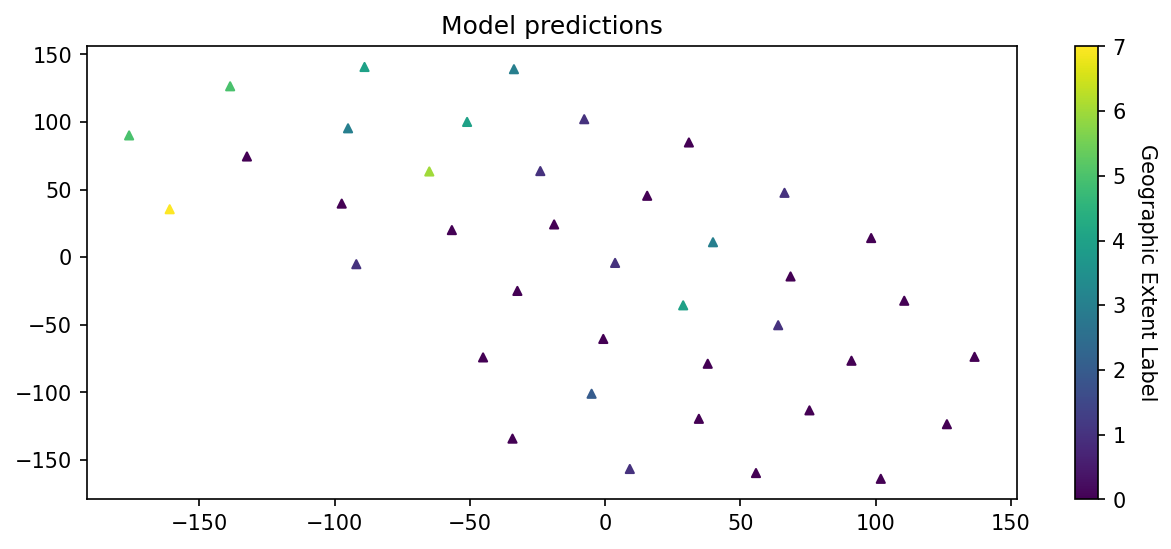

In [127]:
plt.figure(0, figsize=(10, 4), dpi=150)

plt.scatter(X_embedded[:,0][targets.isna()], 
            X_embedded[:,1][targets.isna()], 
            s=8,
            label="nan",
            c="lightgray"
            );

plt.scatter(X_embedded[:,0], 
            X_embedded[:,1], 
            #s=(targets==2)*20+1,
            c=targets,
            s=15,
            marker='^'
            );
#plt.clim(0,1)
cbar = plt.colorbar();
cbar.set_label('Geographic Extent Label', rotation=270, labelpad=15)
plt.title("Model predictions");



In [128]:
subset = dmerge.csv.iloc[np.where(~np.isnan(dmerge.csv.geographic_mean.astype(float)))]

In [35]:
subset.age[subset.sex == "M"].mean()


AttributeError: 'DataFrame' object has no attribute 'age'

In [36]:
subset.age.std()


AttributeError: 'DataFrame' object has no attribute 'age'

In [129]:
dmerge.csv.geographic_mean

0     4
1     7
2     0
3     0
4     6
5     0
6     0
7     5
8     4
9     1
10    0
11    0
12    0
13    0
14    0
15    3
16    1
17    0
18    0
19    3
20    0
21    3
22    0
23    0
24    1
25    1
26    0
27    1
28    1
29    0
30    4
31    1
32    2
33    0
34    0
35    0
36    0
37    0
38    5
Name: geographic_mean, dtype: int64

In [130]:
import sklearn, sklearn.linear_model, sklearn.metrics, sklearn.model_selection
import scipy, scipy.stats
def evaluate(data, labels, title, plot=True, groups=None, seed=0, method="mse", target_str=""):
    X = data
    y = labels.astype(float)
    
    gss = sklearn.model_selection.GroupShuffleSplit(train_size=0.5,test_size=0.5, random_state=seed)
    train_inds, test_inds = next(gss.split(X, y, groups))
    X_train, X_test, y_train, y_test = X[train_inds], X[test_inds], y.iloc[train_inds], y.iloc[test_inds]
    #print("X_train", X_train.shape, "X_test", X_test.shape)

    if method=="mse":
        model = sklearn.linear_model.LinearRegression()
    elif method=="huber":
        model = sklearn.linear_model.HuberRegressor()
    elif method=="mae":
        # loss = max(0, |y - p| - epsilon)
        model = sklearn.linear_model.SGDRegressor(loss="epsilon_insensitive", epsilon=0, l1_ratio=1, random_state=seed)
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    pdiff = y_test - y_pred
    
    res = {}
    res["name"] = title
    res["R^2"] = sklearn.metrics.r2_score(y_test, y_pred)
    res["Correlation"] = scipy.stats.pearsonr(y_pred,y_test)[0]
    res["< 0.7 ACC"] = ((y_pred - y_test) < 0.7).sum()/len(y_test)
    res["explained_variance"] = sklearn.metrics.explained_variance_score(y_test, y_pred)
    res["MAE"] = sklearn.metrics.mean_absolute_error(y_test, y_pred)
    res["MSE"] = sklearn.metrics.mean_squared_error(y_test, y_pred)
    res["method"] = method
    res["# params"] = "{}+1".format(model.coef_.shape[0])

    
    if plot:
        fig, ax = plt.subplots(figsize=(6,4), dpi=100)
        for x,y,yp in zip(y_test,y_test,y_pred):
            plt.plot((x,x),(y,yp),color='red',marker='')

        pmax = int(np.max([y_pred.max(), y_test.max()]))+2
        plt.plot(range(pmax),range(pmax), c="gray", linestyle="--")
        plt.xlim(0,pmax-1)
        plt.ylim(0,pmax-1)

        plt.scatter(y_test, y_pred);
        plt.ylabel("Model prediction ($y_{pred}$)")
        plt.xlabel("Ground Truth ($y_{true}$)")
        plt.title(title);
        plt.text(0.01,0.97, "$R^2$={0:0.2f}".format(res["R^2"])+ "\n"+ 
                 "Correlation={0:0.2f}".format(res["Correlation"]), ha='left', va='top', transform=ax.transAxes)

    return res#, pdiff


In [131]:
groups = dmerge.csv.patientid[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

AttributeError: 'DataFrame' object has no attribute 'patientid'

In [132]:
groups = dmerge.csv.id[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

In [133]:
groups

0     150
1     155
2     201
3     219
4     236
5     249
6     250
7     278
8     425
9     433
10    434
11    435
12    438
13    439
14    440
15    441
16    442
17    443
18    444
19    445
20    447
21    448
22    449
23    450
24    451
25    452
26    454
27    493
28    496
29    518
30    578
31    579
32    582
33    584
34    663
35    665
36    801
37    812
38    813
Name: id, dtype: int64

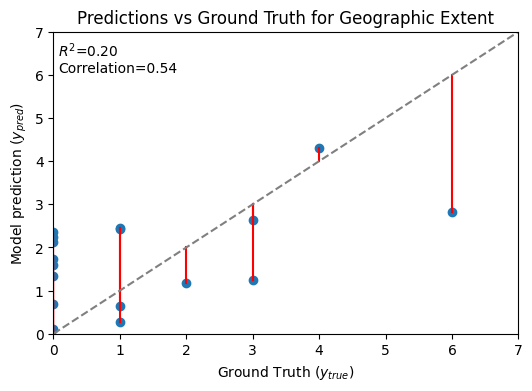

In [134]:
labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
a = evaluate(data, labels,"Predictions vs Ground Truth for Geographic Extent", groups=groups, seed=1)


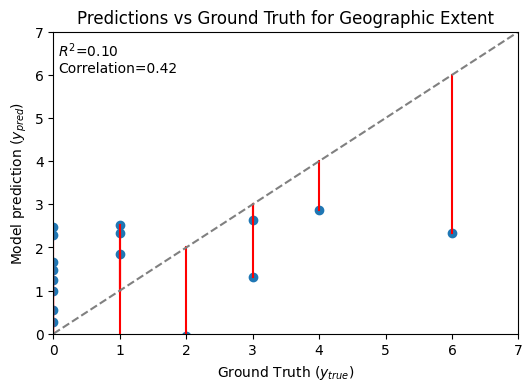

In [135]:
labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Consolidation")]]
a = evaluate(data, labels,"Predictions vs Ground Truth for Geographic Extent", groups=groups, seed=1)


In [136]:
a

{'name': 'Predictions vs Ground Truth for Geographic Extent',
 'R^2': 0.10412471989600558,
 'Correlation': 0.42480388229741284,
 '< 0.7 ACC': 0.55,
 'explained_variance': 0.11597313704970791,
 'MAE': 1.2898736596107483,
 'MSE': 2.4099045034797455,
 'method': 'mse',
 '# params': '1+1'}

In [137]:
dmerge.csv.opacity_mean

0     3
1     4
2     0
3     0
4     4
5     0
6     0
7     3
8     2
9     1
10    0
11    0
12    0
13    0
14    0
15    2
16    1
17    0
18    0
19    2
20    0
21    3
22    0
23    0
24    1
25    2
26    0
27    2
28    1
29    0
30    4
31    2
32    2
33    0
34    0
35    0
36    0
37    0
38    4
Name: opacity_mean, dtype: int64

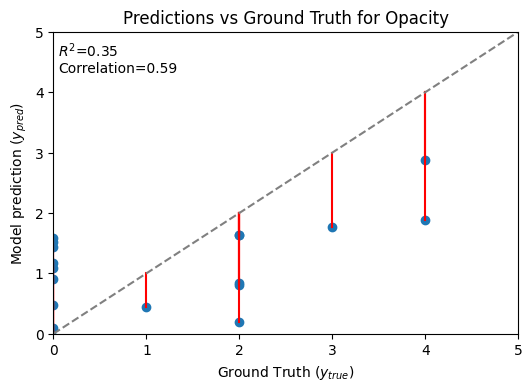

In [138]:
labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
#data = np.concatenate([data,data**2], axis=1)
#data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
a = evaluate(data, labels,"Predictions vs Ground Truth for Opacity", groups=groups, seed=1)

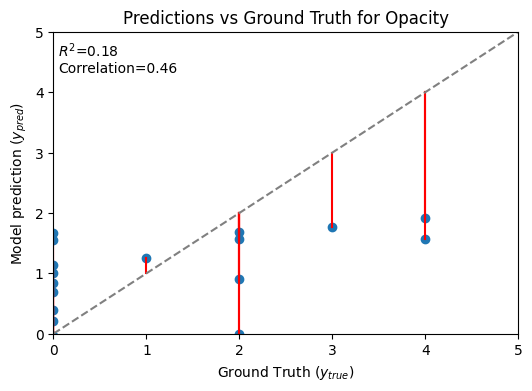

In [139]:
labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Consolidation")]]
#data = np.concatenate([data,data**2], axis=1)
#data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
a = evaluate(data, labels,"Predictions vs Ground Truth for Opacity", groups=groups, seed=1)

In [140]:
a

{'name': 'Predictions vs Ground Truth for Opacity',
 'R^2': 0.18033510356988358,
 'Correlation': 0.46163430064701994,
 '< 0.7 ACC': 0.75,
 'explained_variance': 0.2077908567247515,
 'MAE': 1.0004360795021057,
 'MSE': 1.5491666542529203,
 'method': 'mse',
 '# params': '1+1'}

In [141]:
results = pd.DataFrame()

In [142]:
target_str = "Geographic Extent"
labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

In [143]:
labels

0     4
1     7
2     0
3     0
4     6
5     0
6     0
7     5
8     4
9     1
10    0
11    0
12    0
13    0
14    0
15    3
16    1
17    0
18    0
19    3
20    0
21    3
22    0
23    0
24    1
25    1
26    0
27    1
28    1
29    0
30    4
31    1
32    2
33    0
34    0
35    0
36    0
37    0
38    5
Name: geographic_mean, dtype: int64

In [144]:
# target_str = "Opacity"
# labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

In [145]:
trials = 50
method = "mse"

In [146]:
data = d_feats[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Intermediate network features", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)

In [147]:
data = np.zeros((data.shape[0],1))
for seed in range(trials):
    results = results.append(evaluate(data, labels, "No data", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)


In [148]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "18 outputs", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [149]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (Pneumonia, Infiltration, Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [150]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "2 outputs (Infiltration, Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [151]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "2 outputs (Lung Opacity Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [152]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "2 outputs (Lung Opacity, Pneumonia)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [153]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "4 outputs (Lung Opacity, Pneumonia, Infiltration, Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [154]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (Lung Opacity, Infiltration, Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [155]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (Lung Opacity, Pneumonia, Consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [156]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Lung Opacity output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [157]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Consolidation output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [158]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Pneumonia")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Pneumonia output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [159]:
data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Infiltration")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Infiltration output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [160]:
# data2 = d_feats[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

# weights = model.classifier.weight[xrv.datasets.default_pathologies.index("Lung Opacity"),:].detach().cpu().numpy()
# data = data2[:,np.argsort(np.abs(weights))[-300:]]
# for seed in range(trials):
#     results = results.append(evaluate(data, labels, "Top 300 Features from Lung Opacity", seed=seed), ignore_index=True)

In [161]:
results.groupby(["name", "method"]).agg({
                             'Correlation':['mean','std'],
                             'R^2':['mean','std'],
                             'explained_variance':['mean','std'],
                             'MAE':['mean','std'],
                             'MSE':['mean','std']}).round(2)#.sort_values(("mean_squared_error", "mean"))


Correlation        \
                                                                 mean   std   
name                                               method                     
18 outputs                                         mse           0.16  0.22   
2 outputs (Infiltration, Consolidation)            mse           0.60  0.13   
2 outputs (Lung Opacity Consolidation)             mse           0.63  0.13   
2 outputs (Lung Opacity, Pneumonia)                mse           0.60  0.15   
3 outputs (Lung Opacity, Infiltration, Consolid... mse           0.62  0.13   
3 outputs (Lung Opacity, Pneumonia, Consolidation) mse           0.55  0.17   
3 outputs (Pneumonia, Infiltration, Consolidation) mse           0.61  0.13   
4 outputs (Lung Opacity, Pneumonia, Infiltratio... mse           0.53  0.17   
Consolidation output                               mse           0.59  0.15   
Infiltration output                                mse           0.58  0.13   
Intermediate network features                      mse           0.52  0.17   
Lung Opacity output                                mse           0.68  0.11   
No data                                            mse            NaN   NaN   
Pneumonia output                                   mse           0.65  0.14   

                                                               R^2            \
                                                              mean       std   
name                                               method                      
18 outputs                                         mse    -6750.10  41083.26   
2 outputs (Infiltration, Consolidation)            mse        0.18      0.35   
2 outputs (Lung Opacity Consolidation)             mse        0.26      0.29   
2 outputs (Lung Opacity, Pneumonia)                mse        0.20      0.40   
3 outputs (Lung Opacity, Infiltration, Consolid... mse        0.22      0.32   
3 outputs (Lung Opacity, Pneumonia, Consolidation) mse        0.12      0.42   
3 outputs (Pneumonia, Infiltration, Consolidation) mse        0.20      0.38   
4 outputs (Lung Opacity, Pneumonia, Infiltratio... mse        0.09      0.42   
Consolidation output                               mse        0.17      0.36   
Infiltration output                                mse        0.17      0.30   
Intermediate network features                      mse       -0.04      0.42   
Lung Opacity output                                mse        0.32      0.27   
No data                                            mse       -0.14      0.26   
Pneumonia output                                   mse        0.26      0.35   

                                                          explained_variance  \
                                                                        mean   
name                                               method                      
18 outputs                                         mse              -6256.74   
2 outputs (Infiltration, Consolidation)            mse                  0.25   
2 outputs (Lung Opacity Consolidation)             mse                  0.32   
2 outputs (Lung Opacity, Pneumonia)                mse                  0.26   
3 outputs (Lung Opacity, Infiltration, Consolid... mse                  0.29   
3 outputs (Lung Opacity, Pneumonia, Consolidation) mse                  0.20   
3 outputs (Pneumonia, Infiltration, Consolidation) mse                  0.27   
4 outputs (Lung Opacity, Pneumonia, Infiltratio... mse                  0.17   
Consolidation output                               mse                  0.23   
Infiltration output                                mse                  0.25   
Intermediate network features                      mse                  0.04   
Lung Opacity output                                mse                  0.38   
No data                                            mse                  0.00   
Pneumonia output                                   mse                  0

In [162]:
a = results.groupby(["name", "# params"]).agg({
                             'Correlation':['mean','std'],
                             'R^2':['mean','std'],
                             #'explained_variance':['mean','std'],
                             'MAE':['mean','std'],
                             'MSE':['mean','std']}).round(2).sort_values(("MAE", "mean"))

for c in a.columns.get_level_values(0).unique():
    a[c+"_"] =  a[(c, "mean")].apply("{0:0.2f}".format) + "±" + a[(c, "std")].apply("{0:0.2f}".format)
    del a[c]


In [164]:
a

,,Correlation_,R^2_,MAE_,MSE_
,,,,,
name,# params,,,,
Lung Opacity output,1+1,0.68±0.11,0.32±0.27,1.14±0.17,2.28±0.68
2 outputs (Lung Opacity Consolidation),2+1,0.63±0.13,0.26±0.29,1.19±0.20,2.52±0.80
Pneumonia output,1+1,0.65±0.14,0.26±0.35,1.19±0.17,2.45±0.80
"3 outputs (Lung Opacity, Infiltration, Consolidation)",3+1,0.62±0.13,0.22±0.32,1.22±0.22,2.64±0.86
"2 outputs (Lung Opacity, Pneumonia)",2+1,0.60±0.15,0.20±0.40,1.24±0.20,2.67±0.94
"3 outputs (Pneumonia, Infiltration, Consolidation)",3+1,0.61±0.13,0.20±0.38,1.25±0.20,2.67±0.89
"2 outputs (Infiltration, Consolidation)",2+1,0.60±0.13,0.18±0.35,1.26±0.20,2.77±0.86
Consolidation output,1+1,0.59±0.15,0.17±0.36,1.28±0.17,2.78±0.86


In [165]:
results = pd.DataFrame()

In [166]:
target_str = "Opacity"
#labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))
labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.opacity_mean.astype(float))] 

In [167]:
labels

0     3
1     4
2     0
3     0
4     4
5     0
6     0
7     3
8     2
9     1
10    0
11    0
12    0
13    0
14    0
15    2
16    1
17    0
18    0
19    2
20    0
21    3
22    0
23    0
24    1
25    2
26    0
27    2
28    1
29    0
30    4
31    2
32    2
33    0
34    0
35    0
36    0
37    0
38    4
Name: opacity_mean, dtype: int64

In [168]:
#data = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]

In [169]:
trials = 50
method = "mse"

In [170]:
data = d_feats[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "Intermediate network features", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)

In [171]:
data = np.zeros((data.shape[0],1))
for seed in range(trials):
    results = results.append(evaluate(data, labels, "No data", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)

In [172]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "18 outputs", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [173]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "4 outputs (lung opacity, pneumonia, infiltration, consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [174]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (lung opacity, pneumonia, infiltration)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [175]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (lung opacity, pneumonia, consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [176]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (lung opacity, infiltration, consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [177]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Pneumonia"),
               xrv.datasets.default_pathologies.index("Infiltration"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "3 outputs (pneumonia, infiltration, consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [178]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "2 outputs (lung opacity, consolidation)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [179]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "2 outputs (lung opacity, pneumonia)", plot=False, groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [180]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "lung opacity output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [181]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Consolidation")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "consolidation output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [182]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Pneumonia")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "pneumonia output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [183]:
data = d_preds[~np.isnan(dmerge.csv.opacity_mean.astype(float))]
data = data[:,[xrv.datasets.default_pathologies.index("Infiltration")]]
for seed in range(trials):
    results = results.append(evaluate(data, labels, "infiltration output", plot=False,groups=groups,seed=seed, target_str=target_str, method=method), ignore_index=True)
    

In [184]:
results.groupby(["name", "method"]).agg({
                             'Correlation':['mean','std'],
                             'R^2':['mean','std'],
                             'explained_variance':['mean','std'],
                             'MAE':['mean','std'],
                             'MSE':['mean','std']}).round(2)#.sort_values(("mean_squared_error", "mean"))


Correlation        \
                                                                 mean   std   
name                                               method                     
18 outputs                                         mse           0.16  0.22   
2 outputs (lung opacity, consolidation)            mse           0.65  0.12   
2 outputs (lung opacity, pneumonia)                mse           0.65  0.10   
3 outputs (lung opacity, infiltration, consolid... mse           0.64  0.12   
3 outputs (lung opacity, pneumonia, consolidation) mse           0.59  0.12   
3 outputs (lung opacity, pneumonia, infiltration)  mse           0.64  0.10   
3 outputs (pneumonia, infiltration, consolidation) mse           0.61  0.11   
4 outputs (lung opacity, pneumonia, infiltratio... mse           0.58  0.13   
Intermediate network features                      mse           0.48  0.16   
No data                                            mse            NaN   NaN   
consolidation output                               mse           0.59  0.14   
infiltration output                                mse           0.61  0.11   
lung opacity output                                mse           0.69  0.09   
pneumonia output                                   mse           0.65  0.11   

                                                               R^2            \
                                                              mean       std   
name                                               method                      
18 outputs                                         mse    -2327.21  11122.51   
2 outputs (lung opacity, consolidation)            mse        0.33      0.20   
2 outputs (lung opacity, pneumonia)                mse        0.34      0.18   
3 outputs (lung opacity, infiltration, consolid... mse        0.30      0.22   
3 outputs (lung opacity, pneumonia, consolidation) mse        0.25      0.23   
3 outputs (lung opacity, pneumonia, infiltration)  mse        0.29      0.23   
3 outputs (pneumonia, infiltration, consolidation) mse        0.26      0.23   
4 outputs (lung opacity, pneumonia, infiltratio... mse        0.22      0.25   
Intermediate network features                      mse       -0.10      0.39   
No data                                            mse       -0.12      0.18   
consolidation output                               mse        0.22      0.23   
infiltration output                                mse        0.25      0.20   
lung opacity output                                mse        0.40      0.16   
pneumonia output                                   mse        0.33      0.20   

                                                          explained_variance  \
                                                                        mean   
name                                               method                      
18 outputs                                         mse              -2197.10   
2 outputs (lung opacity, consolidation)            mse                  0.38   
2 outputs (lung opacity, pneumonia)                mse                  0.39   
3 outputs (lung opacity, infiltration, consolid... mse                  0.36   
3 outputs (lung opacity, pneumonia, consolidation) mse                  0.31   
3 outputs (lung opacity, pneumonia, infiltration)  mse                  0.35   
3 outputs (pneumonia, infiltration, consolidation) mse                  0.32   
4 outputs (lung opacity, pneumonia, infiltratio... mse                  0.28   
Intermediate network features                      mse                 -0.00   
No data                                            mse                 -0.00   
consolidation output                               mse                  0.28   
infiltration output                                mse                  0.32   
lung opacity output                                mse                  0.44   
pneumonia output                                   mse                  0

In [185]:
a = results.groupby(["name", "# params"]).agg({
                             'Correlation':['mean','std'],
                             'R^2':['mean','std'],
                             #'explained_variance':['mean','std'],
                             'MAE':['mean','std'],
                             'MSE':['mean','std']}).round(2).sort_values(("MAE", "mean"))

for c in a.columns.get_level_values(0).unique():
    a[c+"_"] =  a[(c, "mean")].apply("{0:0.2f}".format) + "±" + a[(c, "std")].apply("{0:0.2f}".format)
    del a[c]

In [186]:
a

,,Correlation_,R^2_,MAE_,MSE_
,,,,,
name,# params,,,,
lung opacity output,1+1,0.69±0.09,0.40±0.16,0.84±0.11,1.10±0.25
"2 outputs (lung opacity, pneumonia)",2+1,0.65±0.10,0.34±0.18,0.88±0.11,1.22±0.31
"2 outputs (lung opacity, consolidation)",2+1,0.65±0.12,0.33±0.20,0.89±0.14,1.24±0.35
"3 outputs (lung opacity, infiltration, consolidation)",3+1,0.64±0.12,0.30±0.22,0.91±0.15,1.28±0.39
"3 outputs (lung opacity, pneumonia, infiltration)",3+1,0.64±0.10,0.29±0.23,0.91±0.13,1.29±0.34
pneumonia output,1+1,0.65±0.11,0.33±0.20,0.91±0.12,1.23±0.31
"3 outputs (lung opacity, pneumonia, consolidation)",3+1,0.59±0.12,0.25±0.23,0.94±0.15,1.38±0.43
"3 outputs (pneumonia, infiltration, consolidation)",3+1,0.61±0.11,0.26±0.23,0.94±0.13,1.35±0.36


In [95]:
results= results

In [94]:
results

,# params,< 0.7 ACC,Correlation,MAE,MSE,R^2,explained_variance,method,name
0,1024+1,0.50,0.713439,1.540982,2.694122,0.269391,0.296432,mse,Intermediate network features
1,1024+1,0.50,0.713439,1.540982,2.694122,0.269391,0.296432,mse,Intermediate network features
2,1024+1,0.75,0.748590,1.438319,3.007486,0.057768,0.344613,mse,Intermediate network features
3,1024+1,0.00,0.982911,1.487710,2.356198,-2.503640,0.787485,mse,Intermediate network features
4,1024+1,0.00,0.734637,1.379285,2.292540,-2.090198,0.474153,mse,Intermediate network features
...,...,...,...,...,...,...,...,...,...
695,1+1,0.75,0.880845,1.082360,1.769527,0.303850,0.333363,mse,infiltration output
696,1+1,1.00,0.887229,2.400647,7.897580,-1.477672,0.030761,mse,infiltration output
697,1+1,1.00,0.366240,2.003378,4.898191,-3.816906,0.130013,mse,infiltration output
698,1+1,0.25,0.783493,1.606981,2.900844,0.192387,0.229408,mse,infiltration output


In [178]:
labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
#labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
idxs = np.where(~np.isnan(dmerge.csv.geographic_mean.astype(float)))[0]
X = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
X = X[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
#X = X[:,[xrv.datasets.default_pathologies.index("Pneumonia")]]
y = labels.astype(float)

gss = sklearn.model_selection.GroupShuffleSplit(train_size=0.5,test_size=0.5, random_state=seed)
train_inds, test_inds = next(gss.split(X, y, groups))
X_train, X_test, y_train, y_test = X[train_inds], X[test_inds], y.iloc[train_inds], y.iloc[test_inds]
print("X_train", X_train.shape, "X_test", X_test.shape)

model = sklearn.linear_model.LinearRegression()

model = model.fit(X_train, y_train)
y_pred = model.predict(X)

X_train (42, 1) X_test (40, 1)


In [183]:
type(X), X.shape

(numpy.ndarray, (82, 1))

In [180]:
y_pred, len(y_pred)

(array([ 2.8890042 ,  2.4076545 ,  2.9926124 ,  3.6664453 ,  4.3138785 ,
         3.9605048 ,  5.117049  ,  6.6487207 ,  5.4840565 ,  0.34347463,
         0.0553453 ,  1.5120759 ,  2.2496588 ,  2.793904  , -0.18705416,
         3.910999  ,  4.9683323 ,  4.447189  ,  3.1051917 ,  4.623979  ,
         4.6283674 ,  2.5848634 ,  3.5448928 , -1.228122  ,  1.0504708 ,
         1.6839857 ,  3.9013042 ,  1.4786747 ,  2.9628317 ,  1.6034045 ,
         3.9575462 ,  5.722068  ,  3.7964969 ,  2.1254802 ,  2.5170188 ,
         0.5649791 ,  0.9386208 ,  3.4415317 ,  4.6702824 ,  4.3372755 ,
         3.6227078 ,  3.7930894 ,  2.7050445 ,  1.5280895 ,  1.175812  ,
         0.08850551, -0.8424585 ,  1.284476  ,  2.7291472 ,  2.951977  ,
         3.2586784 ,  3.3240852 ,  2.33325   ,  1.575532  ,  4.2277274 ,
         4.4786916 ,  2.7618773 ,  5.265815  ,  6.4494495 ,  6.5705295 ,
         4.3357773 ,  2.6004562 ,  2.0126405 ,  2.5069652 ,  2.7322075 ,
         4.0279675 ,  5.8965445 ,  6.935336  ,  7.0

In [184]:
input_data = d_preds[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]

In [185]:
type(input_data), len(input_data), input_data.shape

(numpy.ndarray, 338, (338, 1))

In [186]:
d_pred_geo = model.predict(d_preds[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]])

In [187]:
d_pred_geo 

array([ 2.8890042 ,  2.4076545 ,  2.9926124 ,  3.6664453 ,  4.3138785 ,
        3.9605048 ,  8.781108  ,  5.117049  ,  6.6487207 ,  0.85483503,
        2.0157986 ,  2.5918438 ,  5.4840565 ,  0.34347463,  0.0553453 ,
        1.5120759 ,  2.2496588 ,  2.793904  , -0.18705416,  3.910999  ,
        4.9683323 ,  4.447189  ,  3.1051917 ,  4.623979  ,  4.6283674 ,
        2.5848634 ,  3.5448928 ,  4.32163   ,  6.348769  , -1.228122  ,
        1.0504708 ,  1.6839857 , -0.34654403,  3.9013042 ,  1.4786747 ,
        2.9628317 ,  1.6034045 ,  3.9575462 ,  5.722068  ,  3.7964969 ,
        2.1254802 ,  2.5170188 ,  0.5649791 ,  0.9386208 ,  3.4415317 ,
        4.6702824 ,  4.3372755 ,  3.6227078 ,  3.7930894 ,  2.7050445 ,
        1.5280895 ,  1.175812  ,  0.08850551, -0.8424585 ,  1.284476  ,
        2.7291472 ,  2.951977  ,  3.2586784 ,  3.3240852 ,  2.33325   ,
        1.575532  ,  4.2277274 ,  4.4786916 ,  2.7618773 ,  5.265815  ,
        6.4494495 ,  6.5705295 ,  4.167769  ,  4.073231  ,  2.59

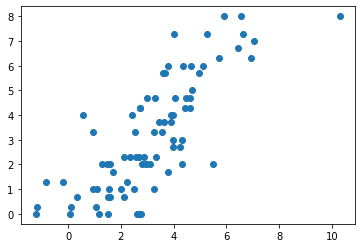

In [188]:
plt.scatter(y_pred,y);

In [189]:
def full_frame(width=None, height=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

In [190]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
(model.coef_), model.intercept_

(array([0.934298], dtype=float32), 3.696541)

In [106]:
float(model.coef_), model.intercept_

(0.9342979788780212, 3.696541)

In [216]:
labels = dmerge.csv.geographic_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
#labels = dmerge.csv.opacity_mean[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
idxs = np.where(~np.isnan(dmerge.csv.geographic_mean.astype(float)))[0]
X = d_preds[~np.isnan(dmerge.csv.geographic_mean.astype(float))]
#X = X[:,[xrv.datasets.default_pathologies.index("Lung Opacity")]]
#X = X[:,[xrv.datasets.default_pathologies.index("Pneumonia")]]
X = X[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia")]]
y = labels.astype(float)

gss = sklearn.model_selection.GroupShuffleSplit(train_size=0.5,test_size=0.5, random_state=seed)
train_inds, test_inds = next(gss.split(X, y, groups))
X_train, X_test, y_train, y_test = X[train_inds], X[test_inds], y.iloc[train_inds], y.iloc[test_inds]
print("X_train", X_train.shape, "X_test", X_test.shape)

model = sklearn.linear_model.LinearRegression()

model = model.fit(X_train, y_train)
y_pred = model.predict(X)

X_train (42, 2) X_test (40, 2)


In [230]:
input_data = d_preds[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia")]]

In [235]:
type(input_data), len(input_data), (input_data.shape)

(numpy.ndarray, 338, (338, 2))

In [204]:
d_pred_geo = model.predict(d_preds[:,[xrv.datasets.default_pathologies.index("Lung Opacity"),
               xrv.datasets.default_pathologies.index("Pneumonia")]])

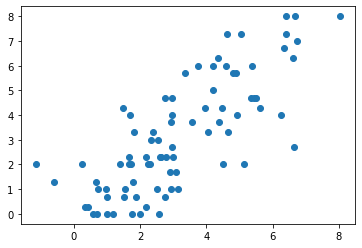

In [205]:
plt.scatter(y_pred,y);

In [206]:
def full_frame(width=None, height=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

In [207]:
type(model)

sklearn.linear_model._base.LinearRegression

In [209]:
(model.coef_), model.intercept_

(array([-0.91371065,  1.7924283 ], dtype=float32), 5.634794)

In [162]:
type(model.intercept_)

numpy.float32

In [77]:
type((model.coef_))

numpy.ndarray

In [163]:
dmerge.csv["markers"] = 'Unknown survival'
#dmerge.csv["markers"][dmerge.csv.went_icu == "Y"] = "Went ICU (unknown survival)"
dmerge.csv["markers"][dmerge.csv.survival == "N"] = "Deceased"
dmerge.csv["markers"][dmerge.csv.survival == "Y"] = "Survived"

In [164]:
markers = {}
markers_edgecolor = {}
markers["Unknown survival"]= "o"
markers_edgecolor["Unknown survival"]= None
markers["Survived"]= "$O$"
markers_edgecolor["Survived"]= "green"
markers["Deceased"]= "x"
markers_edgecolor["Deceased"]= "red"
# markers["Went ICU (unknown survival)"]= "$I$"
# markers_edgecolor["Went ICU (unknown survival)"]= "red"

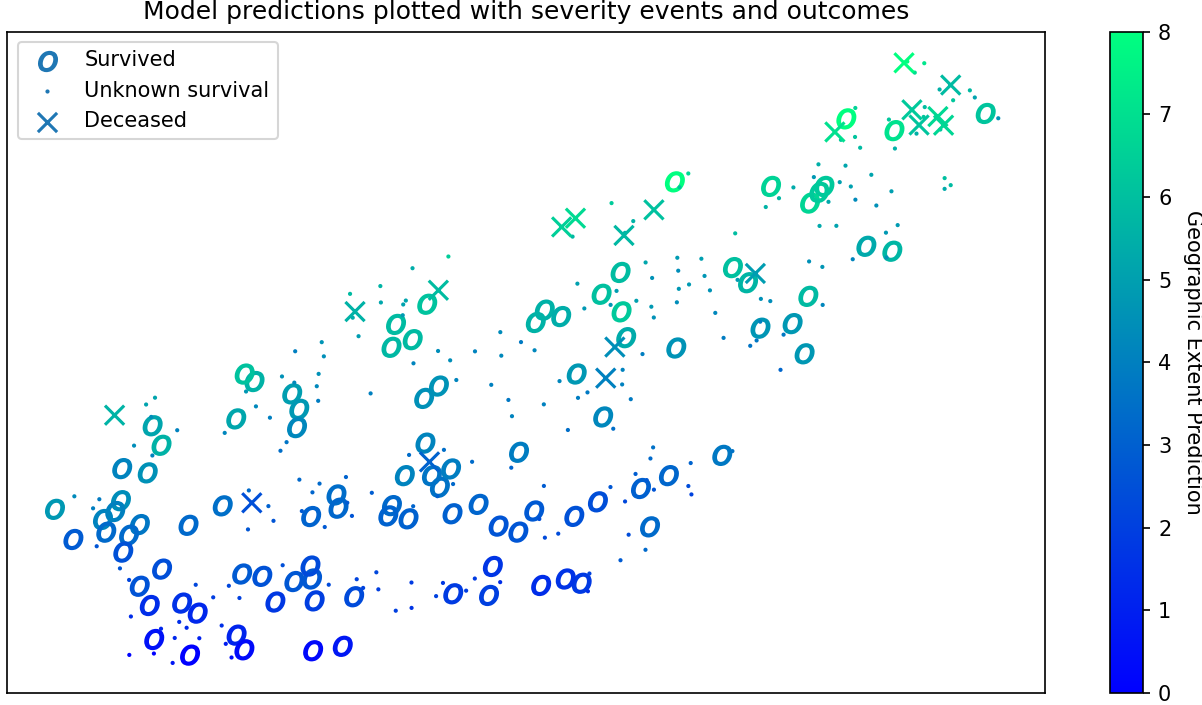

In [165]:
targets = d_pred_geo
fig = plt.figure(0, figsize=(9, 5), dpi=150)

for marker in dmerge.csv["markers"].unique():
    these = dmerge.csv["markers"] == marker
    plt.scatter(X_embedded[:,0][these], 
                X_embedded[:,1][these], 
                #s=(targets==2)*20+1,
                c=targets[these],
                s=1 if markers[marker] == "o" else 85,
                marker=markers[marker],
                cmap="winter",
                label=marker
                );
plt.clim(0,8)
cbar = plt.colorbar();
cbar.set_label('Geographic Extent Prediction', rotation=270, labelpad=15)
plt.title("Model predictions plotted with severity events and outcomes");
plt.legend()
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('tsne-survival.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()



In [202]:
import torch.nn as nn
import torch.nn.functional as F

class GeoExtentNet(nn.Module):
    def __init__(self):
        super(GeoExtentNet, self).__init__()
        self.model = xrv.models.DenseNet(weights="all_cropped_relabelled-nih")
        self.model.op_threshs = None
        self.theta = torch.from_numpy(np.asarray(model.coef_))
        self.bias = torch.from_numpy(np.asarray(model.intercept_))

    def forward(self, x):
        preds = self.model(x)
        preds = preds[:,xrv.datasets.default_pathologies.index("Lung Opacity")]
        preds = preds*self.theta+self.bias
        return preds

In [98]:
import torch.nn as nn
import torch.nn.functional as F
class GeoExtentNet(nn.Module):
    def __init__(self):
        super(GeoExtentNet, self).__init__()
        self.model = xrv.models.DenseNet(weights="all_cropped")
        self.model.op_threshs = None
        self.theta_bias_geographic_extent = torch.from_numpy(
            np.asarray((1.0184412002563477, 5.3219767)))
        self.theta_bias_opacity = torch.from_numpy(
            np.asarray((0.5484423041343689, 2.5535977)))

    def forward(self, x):
        preds = self.model(x)
        preds = preds[0,
                      xrv.datasets.default_pathologies.index("Lung Opacity")]
        geographic_extent = preds * self.theta_bias_geographic_extent[
            0] + self.theta_bias_geographic_extent[1]
        opacity = preds * self.theta_bias_opacity[0] + self.theta_bias_opacity[
            1]
        geographic_extent = torch.clamp(geographic_extent, 0, 8)
        opacity = torch.clamp(opacity, 0, 6)
        return geographic_extent, preds

In [203]:
model2 = GeoExtentNet()

In [239]:
list(zip(test_inds,y.iloc[test_inds].round(2), y_pred[test_inds].round(2)))

[(0, 2.3, 3.37),
 (1, 4.0, 3.46),
 (2, 4.7, 3.89),
 (3, 5.7, 5.12),
 (4, 2.0, 2.91),
 (5, 2.7, 3.63),
 (8, 2.0, 5.26),
 (9, 0.7, 1.96),
 (15, 3.7, 2.98),
 (16, 5.7, 3.16),
 (17, 4.3, 4.17),
 (18, 2.0, 4.19),
 (20, 4.7, 4.98),
 (22, 3.3, 4.41),
 (23, 0.0, 0.49),
 (26, 4.0, 4.64),
 (27, 2.0, 1.64),
 (28, 2.0, 1.1),
 (29, 2.0, -0.19),
 (30, 3.0, 2.54),
 (31, 6.3, 6.52),
 (35, 4.0, 1.08),
 (36, 3.3, 1.04),
 (38, 6.0, 4.69),
 (39, 6.0, 4.02),
 (42, 0.0, 3.89),
 (48, 4.3, 3.45),
 (49, 2.0, 2.26),
 (50, 3.3, 4.93),
 (53, 0.7, 1.37),
 (55, 4.7, 3.31),
 (56, 0.0, 2.88),
 (60, 3.0, 3.52),
 (71, 5.7, 4.52),
 (72, 1.0, 2.88),
 (73, 1.0, 2.65),
 (74, 0.3, 0.18),
 (75, 1.0, 1.36),
 (76, 1.0, 1.85),
 (77, 4.7, 5.7)]

In [240]:
#dmerge[idxs[10]]

In [241]:
#dmerge.csv.iloc[idxs[15]]

In [211]:
idx = 20
img = torch.from_numpy(dmerge[idxs[idx]]["img"]).unsqueeze(0).requires_grad_()
a = model2(img)
print("pred",a)
print("gt", y.iloc[idx])
grads = torch.autograd.grad(a, img)[0][0][0]
#grads = torch.abs(torch.autograd.grad(a, img)[0][0][0])

pred tensor([0.4924], grad_fn=<AddBackward0>)
gt 4.7


In [216]:
a, type(a), len(a), a.shape, a.dtype

(tensor([0.4924], grad_fn=<AddBackward0>),
 torch.Tensor,
 1,
 torch.Size([1]),
 torch.float32)

In [205]:
nn_model
nn_model.op_threshs = None # to prevent sigmoid
nn_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [92]:
nn_model = xrv.models.DenseNet(weights="all_cropped")
nn_model.op_threshs = None # to prevent sigmoid

In [209]:
idx = 20
img = torch.from_numpy(dmerge[idxs[idx]]["img"]).unsqueeze(0).requires_grad_()
a = nn_model(img)
print("pred",a)
print("gt", y.iloc[idx])
grads = torch.autograd.grad(a, img)[0][0][0]
#grads = torch.abs(torch.autograd.grad(a, img)[0][0][0])

pred tensor([[-2.9856, -1.7349, -0.7550, -4.4853, -4.8157, -6.0674, -2.9773, -3.0155,
         -4.2851, -3.1433, -2.4854, -1.6454, -0.4477, -8.0576, -5.2278, -3.2530,
          0.9974, -1.6949]], grad_fn=<AddmmBackward>)
gt 4.7


RuntimeError: grad can be implicitly created only for scalar outputs

In [83]:
dmerge.csv.iloc[idxs[idx]].filename

'1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg'

In [206]:
import skimage, skimage.filters
blurred = skimage.filters.gaussian(grads**2, sigma=(5, 5), truncate=3.5)

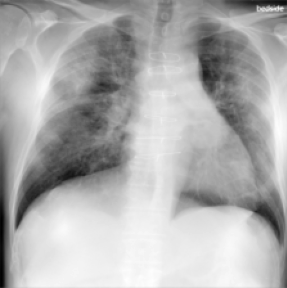

In [207]:
full_frame()
plt.imshow(img[0][0].detach(), cmap="gray");

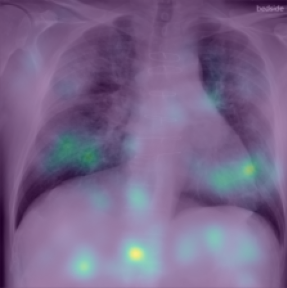

In [208]:
full_frame()
plt.imshow(img[0][0].detach(), cmap="gray")
plt.imshow(blurred, alpha=0.5);

In [72]:
# plt.imshow(img[0][0].detach(), cmap="gray")
# plt.imshow(torch.abs(grads), alpha=0.5)
# plt.axis('off')

In [73]:
# plt.imshow(img[0][0].detach(), cmap="gray")
# plt.imshow(torch.abs(grads), alpha=0.5)
# print(plt.gca().get_images()[1].get_clim())
# plt.gca().get_images()[1].set_clim(0, 0.0003)
# plt.axis('off')

In [253]:
img.detach().max()

tensor(492.0085)

In [254]:
torch.abs(grads).max()

tensor(0.0025)